# THE SPARKS FOUNDATION

## By- Pushpanjali Gupta

## Task2- Prediction using Unsupervised Machine Learning

###### The objective is to predict the optimum number of clusters and visualize it graphically. 

## Import the required libraries

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load the dataset

In [2]:
# Load the Iris Dataset
from sklearn import datasets
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)
print("Dataset imported successfully")
data.head() 

Dataset imported successfully


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.target_names   # target names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.target       # target values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Describe the data

In [5]:
# Basic description of the data
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualize the dataset correlation

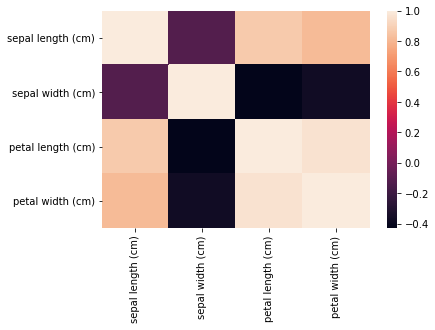

In [6]:
corr = data.corr()
sns.heatmap(corr)

In [7]:
# Splitting the data into 'attributes' and 'labels'
X = data.iloc[:, :].values
y = iris.target

###### Here we have to make clusters so  there is no need to split the data into train and test set

## Checking for the minimum no. of clusters

In [8]:
# Using The Elbow Method to find the minimun number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

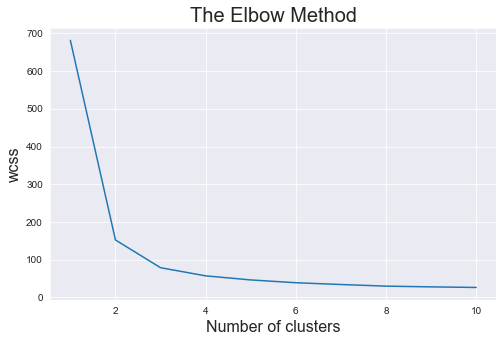

In [9]:
# Visualizing The Elbow Method to find the minimun number of clusters
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method",size=20)
plt.xlabel("Number of clusters",size=16)
plt.ylabel("wcss",size=16)
plt.show()

###### According to the Elbow method we came to know that this iris dataset must have minimum 3 no. of clusters

## Training the model

In [10]:
# Applying K-means to the Iris dataset
kmeans = KMeans(n_clusters=3,init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

## Graphical Visualization

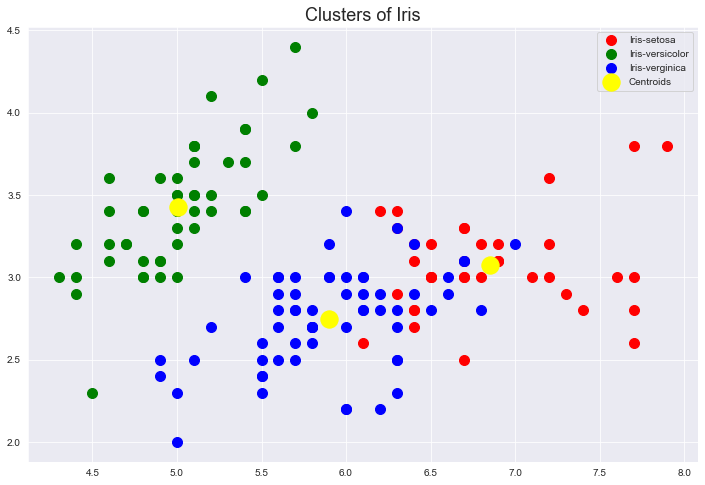

In [11]:
# Visualizing the clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c="red", label="Iris-setosa")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c="green", label="Iris-versicolor")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c="blue", label="Iris-verginica")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")
plt.title("Clusters of Iris",size=18)
plt.legend()
plt.show()

# THANK YOU!